***Import Libraries***

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing,cluster,metrics
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

***Load Dataset***

In [37]:
dataset=pd.read_csv("/content/Mall_Customers.csv")
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [38]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


***Data Visualization***

<Axes: xlabel='Age', ylabel='Frequency'>

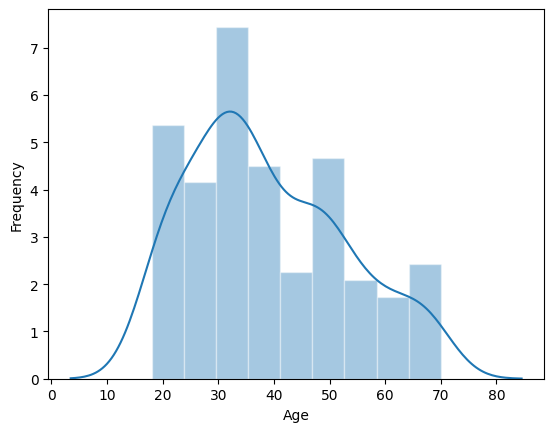

In [48]:
sns.histplot(
    dataset["Age"], kde=True,
    stat="frequency", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

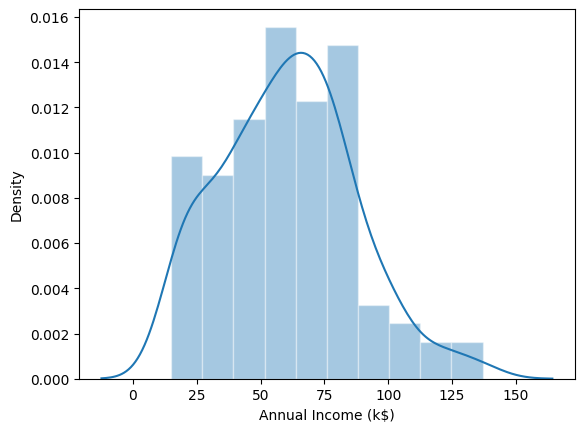

In [49]:
sns.histplot(
    dataset["Annual Income (k$)"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

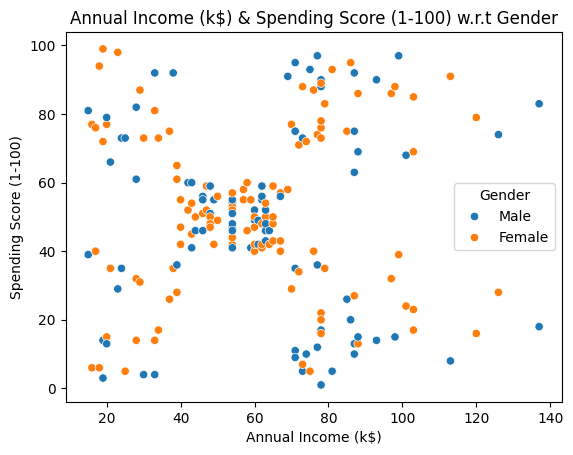

In [53]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=dataset)
plt.title("Annual Income (k$) & Spending Score (1-100) w.r.t Gender")
plt.show()

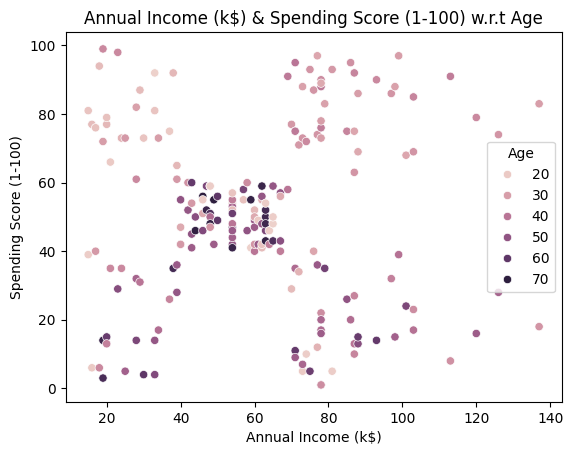

In [57]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Age", data=dataset)
plt.title("Annual Income (k$) & Spending Score (1-100) w.r.t Age")
plt.show()

***clustring on Age & Annual Income (k$) & Spending Score (1-100)"	***





In [70]:
data1=dataset[["Age","Annual Income (k$)","Spending Score (1-100)"]]
data1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [72]:
wcss = []
for i in range(1, 11):
    k_means = cluster.KMeans(n_clusters=i,init='k-means++', random_state=0,n_init="auto")
    k_means.fit(data1)
    wcss.append(k_means.inertia_)

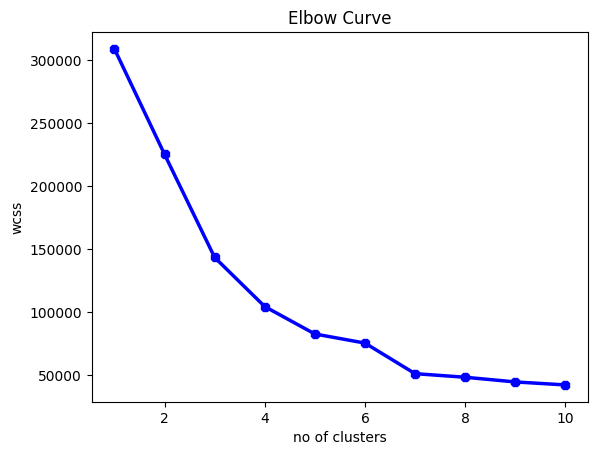

In [73]:
# the elbow curve
plt.plot(range(1,11), wcss,linewidth=2.5, color="blue", marker="8")
plt.title('Elbow Curve')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [74]:
# group with 5 clusters
model = cluster.KMeans(n_clusters=7, n_init="auto", init='k-means++', random_state=0)
model.fit(data1)

KMeans(n_clusters=7, n_init='auto', random_state=0)

***Feature Selection***

In [54]:
data=dataset[["Annual Income (k$)","Spending Score (1-100)"]]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


***Determine number of clusters***

In [71]:
wcss = []
for i in range(1, 11):
    k_means = cluster.KMeans(n_clusters=i,init='k-means++', random_state=0,n_init="auto")
    k_means.fit(data)
    wcss.append(k_means.inertia_)

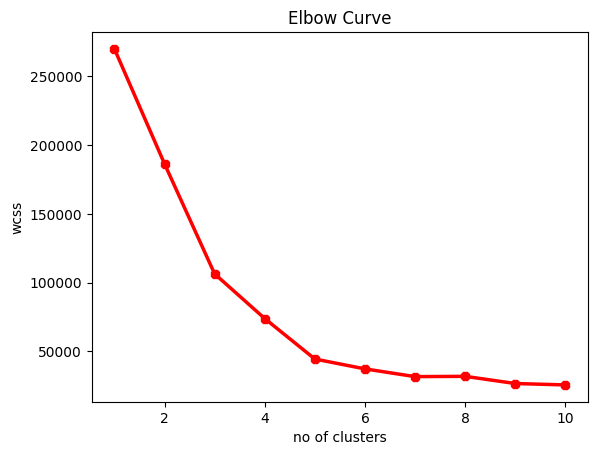

In [66]:
# the elbow curve
plt.plot(range(1,11), wcss,linewidth=2.5, color="red", marker="8")
plt.title('Elbow Curve')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

***Build model with 5 clusters***


In [67]:
# group with 5 clusters
model = cluster.KMeans(n_clusters=5, n_init="auto", init='k-means++', random_state=0)
model.fit(data)
y_pred =model.predict(data)
dataset["label"] = y_pred

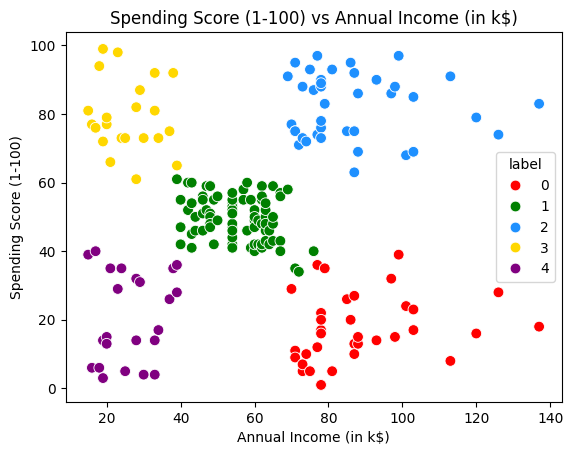

In [68]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]
# scatterplot of the clusters
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="label",
    palette=colors,
    legend="full",
    data=dataset,
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()